In [38]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [39]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [40]:
X_test.shape

(10000, 32, 32, 3)

In [41]:
X_train.shape

(50000, 32, 32, 3)

In [42]:
y_train.shape

(50000, 1)

In [43]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [44]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [45]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [46]:
classes[9]

'truck'

In [47]:
len(classes)

10

In [48]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

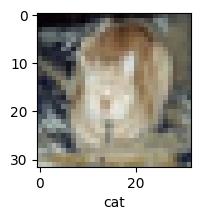

In [49]:
plot_sample(X_train,y_train,33)

## Normalisation

In [50]:
X_train=X_train/255
X_test=X_test/255


In [55]:
ann= models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 350s 223ms/step - accuracy: 0.2737 - loss: 2.1947
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 372s 238ms/step - accuracy: 0.4002 - loss: 1.6734
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 339s 217ms/step - accuracy: 0.4332 - loss: 1.5875
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 363s 232ms/step - accuracy: 0.4552 - loss: 1.5267
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 363s 232ms/step - accuracy: 0.4651 - loss: 1.4853


In [57]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.4483 - loss: 1.5372


[1.5420862436294556, 0.44839999079704285]

In [64]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')

])

In [67]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [69]:
cnn.fit(X_train,y_train,epochs=30)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7310 - loss: 0.7676
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7379 - loss: 0.7515
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7458 - loss: 0.7350
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7472 - loss: 0.7242
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7545 - loss: 0.7043
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7657 - loss: 0.6750
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7680 - loss: 0.6609
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7743 - loss: 0.6511
Epoch 9/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7753 - loss: 0.6400
Epoch 10/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7820 - loss: 0.6205
Epoch 11/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7827 - loss: 0.6168
Epoch 12/30
1563/15

In [70]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6776 - loss: 1.1672


[1.1764395236968994, 0.6729999780654907]

In [71]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

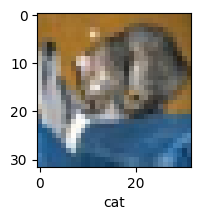

In [73]:
plot_sample(X_test,y_test,0)

In [74]:
y_pred=cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [77]:
y_pred[:5]

array([[3.9035887e-05, 2.9409966e-07, 1.1332688e-02, 8.2425052e-01,
        7.6914806e-04, 1.3193600e-01, 3.1655185e-02, 4.3317609e-06,
        1.2705675e-05, 7.2571645e-08],
       [8.6700047e-06, 4.1412551e-02, 2.9946948e-11, 1.1779892e-08,
        2.0559047e-13, 1.2989791e-10, 1.4685114e-11, 1.3248835e-12,
        9.5857042e-01, 8.3180785e-06],
       [1.9813759e-02, 6.6166943e-01, 2.5285766e-04, 2.4379966e-04,
        1.1948693e-08, 2.8045096e-07, 1.0681650e-04, 1.5945080e-08,
        3.1423107e-01, 3.6819056e-03],
       [9.3412638e-01, 9.8595854e-05, 6.0290503e-03, 2.2222989e-04,
        2.8575704e-04, 2.6851956e-05, 2.3921692e-07, 4.8292166e-04,
        5.8702923e-02, 2.5056548e-05],
       [6.1512857e-08, 5.1450235e-05, 2.0069765e-02, 4.3477016e-03,
        2.6994066e-02, 2.1965045e-05, 9.4842172e-01, 2.6300082e-08,
        3.9539996e-06, 8.9253299e-05]], dtype=float32)

In [79]:
y_classes= [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [80]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

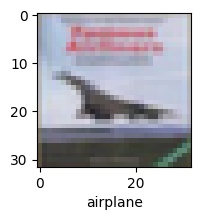

In [82]:
plot_sample(X_test,y_test,3)

In [86]:
classes[y_classes[3]]

'airplane'